# Preliminaries
These lectures are a mix of Qiskit Machine Learning book, our book and some exercises. They consist of a series of Jupyter notebooks. 

1. For running these locally, you'll need: 
   1. [Conda](https://conda.io/projects/conda/en/latest/user-guide/install/index.html)
   2. `git` (optionally a github account) 
   3. (optional) an IDE (like Dataspell or PyCharm)
   4. (optional) A server with GPUs  
   you can also use services like IBMQ, however they offer very limited resources at free tier.  
2. Create a conda environment that runs python=3.8 and has packages `qiskit-machine-learning`, `jupyter` 
3. go to [course github page](https://github.com/osbama/Phys710) and clone the repository (you'll need to pull the updates at each lecture)  

# Introduction

Machine learning has established itself as a successful interdisciplinary field which seeks to find patterns in data. Throwing in quantum computing gives rise to interesting areas of research that aim to use the principles of quantum mechanics to augment machine learning, or vice-versa. On this page, we aim to give you a glimpse into the exciting and rapidly changing field of near-term quantum machine learning.

## Machine Learning (ML)

Before we dive into quantum machine learning, let's do a whirlwind overview of machine learning. For our purposes, machine learning can be split roughly into three subfields: supervised learning, unsupervised learning, and reinforcement learning.

### Supervised Learning

<img alt="supervised.png" src="./supervised.png" width="600"/>

Given tuples of labeled data $(x_i,y_i)$ , we aim to learn the function that maps $f:x \mapsto y$ and generalizes to unseen inputs. For example, given a set of labeled photos of cats or dogs, we want to identify new photos of cats or dogs.

### Unsupervised Learning

<img alt="unsupervised.png" src="./unsupervised.png" width="600"/>

Given a collection of unlabeled data $(x_i)$, we aim to learn some structure of the data; for example, grouping a set of viewers based on their movie viewing history in order to recommend new movies.

### Reinforcement Learning

<img alt="reinforcement.png" src="./reinforcement.png" width="600"/>

Given access to an environment that rewards us based on our actions, we aim to maximise our expected rewards; for example, algorithmically learning how to play PAC-MAN.

## Quantum Machine Learning (QML)

There are four different approaches to combining quantum computing and machine learning, differentiated by whether the data is classical (C) or quantum (Q), or whether the algorithm runs on a classical (C) or quantum (Q) computer. CC refers to processing Classical data using Classical computers, but using algorithms inspired by quantum computing, such as this recommendation system algorithm. CQ refers to processing Classical data using Quantum machine learning algorithms, and will be what this chapter focuses on. QC refers to processing Quantum data using Classical machine learning algorithms. This is an active area of investigation, with classical machine learning algorithms used in many areas in the quantum computing, such as qubit characterization, control and readout. QQ refers to processing Quantum data using Quantum machine learning algorithms. This is an interesting topic, but very much still in its infancy.

In this context, a quantum dataset consists of observations from a natural or artificial quantum system, such as measurements of qubit interactions, while a classical dataset consists of observations from a classical system, such as time series, text, or images.

There are two distinct categories of QC algorithms: those that require quantum random access memory (qRAM) and those who don't. "Random access memory" (RAM) is data storage that can be read and changed in any order. Quantum RAM is analogous, but would also allow storing quantum states The various proposed qRAM-based QML algorithms, e.g. qPCA, qSVM and qClustering, boast exponential speedups compared to their classical algorithms, however there are currently no viable hardware candidates for realizing qRAM.

Recently, most of the focus of CQ approaches to machine learning has been on near-term algorithms that can be executed on the current quantum devices. Classical machine learning techniques have made great strides in the past decade, enabled in large part by the availability of sufficiently powerful hardware. Maybe the existence of quantum hardware might enable further advances in the field.

Note that this is a very dynamic area of current investigation by multiple research teams worldwide, and there are still many open questions, as well as confusing terminology and notation. We will try and be as consistent as possible in this course, but also point out when concepts have been referred to by different names, or how different concepts relate to each other.

# Parameterized quantum circuits

Parameterized quantum circuits, where the gates are defined through tunable parameters, are a fundamental building block of near-term quantum machine learning algorithms. In the literature, depending on the context, parameterized quantum circuits are also called parameterized trial states, variational forms, or ansatzes.

Here is an example of a simple parameterized circuit, with two parameterized gates, a single-qubit $z$-rotation gate, with a variable rotation $\theta$, followed by a two-qubit controlled $z$-rotation gate, with the same variable rotation $\theta$. 

We can create the parameterized circuit above using the `QuantumCircuit` and `Parameter` classes. The Parameter class lets us add rotation gates, without having to specify what the angles are yet: 

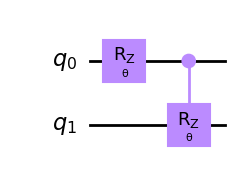

In [1]:
from qiskit.circuit import QuantumCircuit, Parameter
theta = Parameter('θ')

qc = QuantumCircuit(2)
qc.rz(theta, 0)
qc.crz(theta, 0, 1)
qc.draw(output='mpl')

As all quantum gates used in a quantum circuit are unitary (A unitary operation is a reversible operation that preserves the norm (i.e. makes sure our probabilities always sum to 1)), a parameterized circuit itself can be described as a unitary operation on $n$ qubits, $U_\phi$, acting on some initial state $|\phi_0\rangle$, often set to $|0\rangle^{\otimes n}$. The resulting parameterized quantum state is $ |\psi_0\rangle=U_\theta|\phi_0\rangle$ where $\theta$ is a set of tunable parameters.


## Parameterized quantum circuit properties

How do we choose one parameterized circuit over the other? To use parameterized quantum circuits as a machine learning model, we need them to generalize well. This means that the circuit should be able to generate a significant subset of the states within the output Hilbert space (Hilbert space is what you get when you generalize the 3D space we're used to (called Euclidean space) to as many dimensions as you want. It’s named after David Hilbert.). To avoid being easy to simulate on a classical computer, the circuit should also entangle qubits.

A proposed metric for this purpose is called the expressibility and entangling capability to discriminate between different parameterized quantum circuits. We can think of the expressibility of a circuit as the extent to which it can generate states within the Hilbert space, while the entangling capability of a circuit describes its ability to generate entangled states.

### Expressibility

The expressibility of a parameterized quantum circuit is essentially the coverage of the Hilbert space by the circuit's hypothesis space. Highly expressive parameterized quantum circuits can represent many different unitaries. There are many ways to represent this expressibility. In the [original reference](https://arxiv.org/abs/1905.10876)  the authors quantify it by computing the extent to which the states generated from the circuit deviate from the uniform distribution (If the chance of producing any quantum state is equally probable, we say the states are uniformly distributed.)

Let's compare the two following single-qubit circuits to get a sense of what it means for a circuit to be expressible or not, by sampling 2000 output states for each circuit and plotting them on a Bloch sphere. 

<img alt="example1.png" src="./example1.png" width="1200"/>

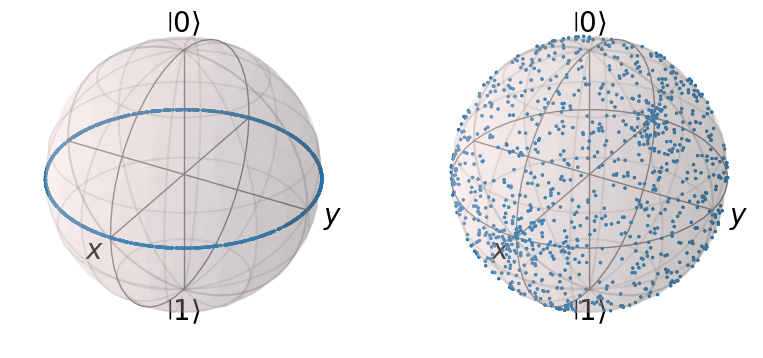

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# First, we need to define the circuits:
theta_param = Parameter('θ')
phi_param = Parameter('Φ')

# Circuit A
#### Code me
# Circuit B
#### Code me

# Next we uniformly sample the parameter space for the two parameters theta and phi
np.random.seed(0)
num_param = 1000
theta = [2*np.pi*np.random.uniform() for i in range(num_param)]
phi = [2*np.pi*np.random.uniform() for i in range(num_param)]

# Then we take the parameter value lists, build the state vectors corresponding
# to each circuit, and plot them on the Bloch sphere:
from qiskit.visualization.bloch import Bloch
from qiskit.quantum_info import Statevector

def state_to_bloch(state_vec):
    # Converts state vectors to points on the Bloch sphere
    phi = np.angle(state_vec.data[1])-np.angle(state_vec.data[0])
    theta = 2*np.arccos(np.abs(state_vec.data[0]))
    return [np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)]

# Bloch sphere plot formatting
width, height = plt.figaspect(1/2)
fig=plt.figure(figsize=(width, height))
ax1, ax2 = fig.add_subplot(1, 2, 1, projection='3d'), fig.add_subplot(1, 2, 2, projection='3d')
b1,b2 = Bloch(axes=ax1), Bloch(axes=ax2)
b1.point_color, b2.point_color = ['tab:blue'],['tab:blue']
b1.point_marker, b2.point_marker= ['o'],['o']
b1.point_size, b2.point_size=[2],[2]

# Calculate state vectors for circuit A and circuit B for each set of sampled parameters
# and add to their respective Bloch sphere
for i in range(num_param):    
    state_1=Statevector.from_instruction(qc_A.bind_parameters({theta_param:theta[i]}))
    state_2=Statevector.from_instruction(qc_B.bind_parameters({theta_param:theta[i], phi_param:phi[i]}))
    b1.add_points(state_to_bloch(state_1))
    b2.add_points(state_to_bloch(state_2))

b1.show()
b2.show()

For Circuit A, we see output states distributed about the equator of the Bloch sphere. With Circuit B's additional parameterized $z$-rotation gate, we can cover all the Bloch sphere with output states, but the coverage is not uniform; there are concentrations of points on the $+X$ and $-X$ poles of the Bloch sphere.

Expressibility is a way to quantify what we just observed for these single-qubit circuits. Circuit A would have a low expressibility score due to the limited set of states it can explore, whereas Circuit B would have a high expressibility score. 

### Entangling capability

Entanglement is a key resource in quantum computing. The Meyer-Wallach measure (A measure of the average entanglement between qubits in the range 0 to 1.) is one of many metrics that measures how entangled a given state is. The Meyer-Wallach measure of an unentangled product state (Here, a product state is a state that can be written as the product of two separate kets, e.g. $|\psi\rangle = |a\rangle \otimes |b\rangle) is 0, while the Meyer-Wallach measure of a highly entangled state, such as the Bell state, is 1. The entangling capability of a parameterized quantum circuit can be defined as the average Meyer-Wallach measure for the states it can generate.

For example, consider the following multi-qubit parameterized circuits:

<img alt="example2.png" src="./example2.png" width="1200"/>

Circuit A has no entangling operations, that is, no two-qubit gates, so it has no entangling capability. Thus, this circuit would produce states that have Meyer-Wallach measures of 0, leading to an averaged value of 0. Circuit B has several two-qubit gates, so it can generate quantum states with some entanglement. Therefore, the average Meyer-Wallach measure would be greater than 0.

Using these two parameterized quantum circuit descriptors, expressibility and entangling capability, we can identify circuits that have limited capabilities. We expect that limited circuits are poor candidates for quantum machine learning applications. There is a strong correlation between classification accuracy and expressibility, and a weak correlation between classification accuracy entangling capability.


### Hardware efficiency

In this era of near term quantum computing, where devices have limited qubit connectivity (When building a real quantum computer, depending on how we build it, we might not be able to interact each qubit (e.g. through a CNOT gate) directly. If we can interact two qubits directly, we say they are connected), coherence times (This is the time it takes for a quantum system to stop being 'coherent' with itself, meaning we can't interfere it with itself any more) and gate fidelities, the depth of the circuits we run directly affects the accuracy of our results, since there is limited error correction or mitigation.

[This reference](https://arxiv.org/abs/1704.05018) introduces a class of hardware efficient parameterized circuits to accommodate device constraints. The common trait of these circuits is the use of a limited set of quantum gates as well as a particular qubit connection topology. The gate set usually consists of one two-qubit entangling gate and up to three single-qubit gates. The circuit is then constructed from blocks of single-qubit gates and entangling gates, which are applied to multiple or all qubits in parallel. One sequence of a single-qubit and an entangling block is called a layer, and the parameterized circuit generally has multiple layers.

Circuit B depicted in the 'Entangling Capability' section is an example of a single layer hardware efficient parameterized circuit.

## Parameterized quantum circuits for machine learning

In quantum machine learning, parameterized quantum circuits tend to be used for two things:
* To encode data, where the parameters are determined by the data being encoded
* As a quantum model, where the parameters are determined by an optimization process.

Here we will give some examples of how to build parameterized quantum circuits used in the quantum machine learning literature using Qiskit.

In [this reference](https://arxiv.org/abs/1804.11326), the authors introduce the following parameterized circuit, used to encode data, which we will study in detail later
$$ \begin{align*}\mathcal{U}_{\Phi(\mathbf{x})}=\prod_d U_{\Phi(\mathbf{x})}H^{\otimes n},\ U_{\Phi(\mathbf{x})}=\exp\left(i\sum_{S\subseteq[n]}\phi_S(\mathbf{x})\prod_{k\in S} P_i\right),\end{align*} $$

which contains layers of Hadamard gates interleaved with entangling blocks, $U_{\Phi(\mathbf{x})}$. This unitary was chosen because it is classically difficult to compute, but tractable on near term hardware. Within the entangling blocks, $U_{\Phi(\mathbf{x})}:P_i \in \{ I, X, Y, Z \}$ denotes the Pauli matrices, the index $S$ describes connectivity between different qubits: $S \in \{\binom{n}{k}\ \text{combinations},\ k = 1,... n \}$, and the data mapping function $\phi_S(\mathbf{x})$  is

$$
\begin{align*}\phi_S:\mathbf{x}\mapsto \Bigg\{\begin{array}{ll} x_i & \mbox{if}\ S=\{i\} \\ (\pi-x_i)(\pi-x_j) & \mbox{if}\ S=\{i,j\} \end{array}\end{align*}
$$

Specifically, they use $k=2$, $P_0=Z$,$P_1=ZZ$, which in Qiskit is the `ZZFeatureMap` circuit:



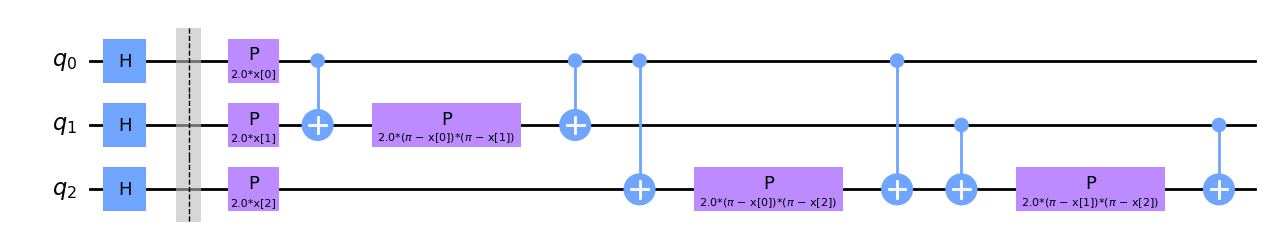

In [3]:
from qiskit.circuit.library import ZZFeatureMap
qc_zz = ZZFeatureMap(3, reps=1, insert_barriers=True)
qc_zz.decompose().draw(output='mpl')

the authors also use a hardware efficient circuit as a quantum model, consisting of alternating layers of single-qubit rotation gates, followed by two-qubit gates. In particular, they use $y$-and-$z$-rotation gates, and controlled-$z$ gates, which we can build using the `TwoLocal` circuit:

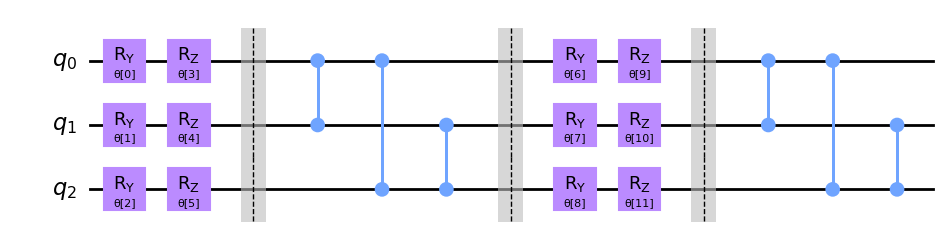

In [5]:
from qiskit.circuit.library import TwoLocal
qc_twolocal = TwoLocal(num_qubits=3, reps=2, rotation_blocks=['ry','rz'],
                entanglement_blocks='cz', skip_final_rotation_layer=True,
                insert_barriers=True)

qc_twolocal.decompose().draw(output='mpl')

# Data Encoding

Data representation is crucial for the success of machine learning models. For classical machine learning, the problem is how to represent the data numerically, so that it can be best processed by a classical machine learning algorithm.

For quantum machine learning, this question is similar, but more fundamental: how to represent and efficiently input the data into a quantum system, so that it can be processed by a quantum machine learning algorithm. This is usually referred to as data encoding, but is also called data embedding or loading.

This process is a critical part of quantum machine learning algorithms and directly affects their computational power.

## Methods

Let's consider a classical dataset $\mathscr{X}$ consisting of $M$ samples, each with $N$ features (A feature is a property of the things we're trying to learn about that we can assign a number to. If we were learning something about cats, the features might be "height" or "age" or "propensity to consume treats"): 

$$
\begin{align*}{\mathscr{X}} = {\{}x^{(1)},{\dots},{x^{(m)}},\dots,x^{(M)}{\}}\end{align*}
$$



where $ x^{(m)}$ is an $N$ dimensional vector for $m=1,\dots,M. To represent this dataset in a qubit system, we can use various embedding techniques, some of which are briefly explained and implemented below.



### Basis encoding

Basis encoding associates a classical $N$-bit string with a computational basis state (Also known as Z-basis states, these are the states we measure when we measure in the Z (or 'computational') basis. These are the states with labels like $|00\rangle$ and $|00110100\rangle$. IBM systems always measure in the Z-basis.) of a $N$-qubit system. For example, if $x=5$, this can be represented as a 4-bit string as $0101$, and by a 4-qubit system as the quantum state $|0101\rangle$. More generally, for an $N$-bit string: $x=(b_1,b_2,\dots,b_n)$ , the corresponding $n$-qubit state is $| x \rangle = | b_1, b_2, ... , b_N \rangle $ with $b_n \in {0,1}$ for $n=1,...,N$.

For the classical dataset $\mathscr{X}$  described above, to use basis encoding, each data point must be a $N$-bit string: $x^{(m)} = (b_1, b_2, ... , b_N)$, which then can be mapped directly to the quantum state $|x^{m}\rangle = |b_1, b_2, ... , b_N \rangle$  with $b_n \in \{0, 1 \} $ for $n=1,...,N$ and $m=1,...,M$ . We can represent the entire dataset as superpositions of computational basis states:

$$
\begin{align*} | \mathscr{X} \rangle = \frac{1}{\sqrt{M}}{\sum_{m=1}^{M}|x^{m} \rangle \end{align*}
$$

In Qiskit, once we calculate what state will encode our dataset, we can use the initialize function to prepare it. For example, the dataset $\mathscr{X} = \{x^{(1)}=101, x^{(2)}=111\}$ is encoded as the state : $|\mathscr{X}\rangle = \frac{1}{\sqrt{2}}(|101\rangle+|111\rangle)$

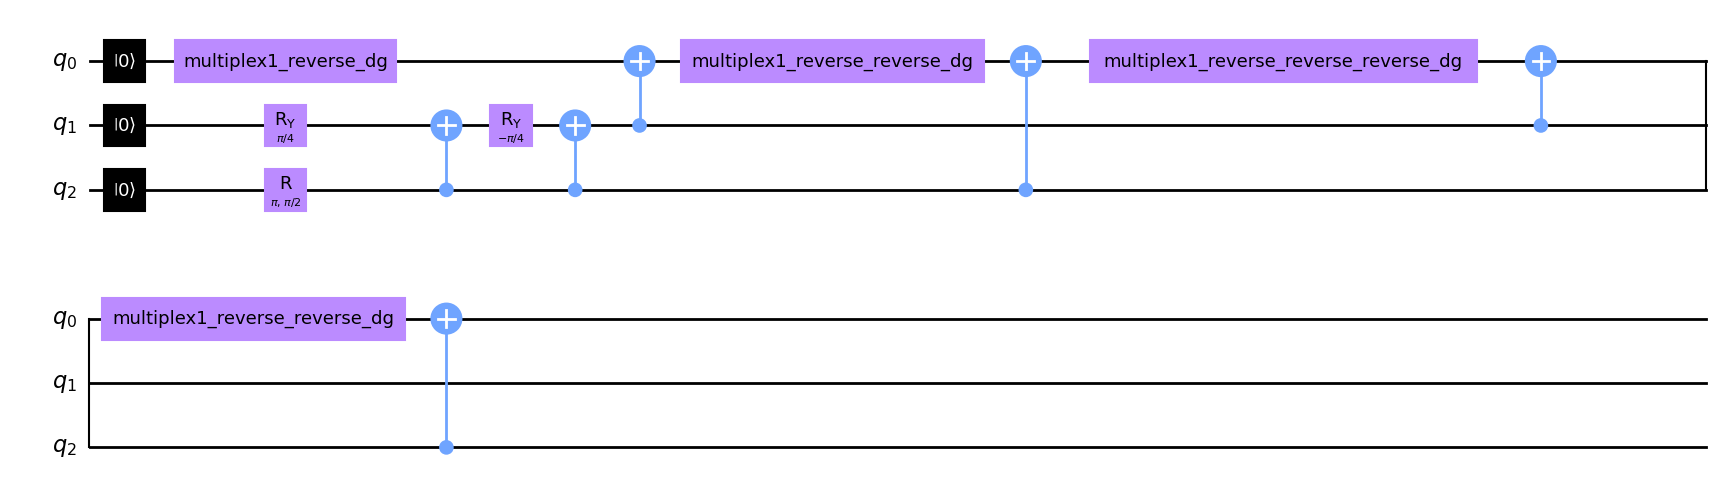

In [8]:
import math
from qiskit import QuantumCircuit

desired_state = [
    0,
    0,
    0,
    0,
    0,
    1 / math.sqrt(2),
    0,
    1 / math.sqrt(2)]

qc = QuantumCircuit(3)
qc.initialize(desired_state, [0,1,2])
qc.decompose().decompose().decompose().decompose().decompose().draw(output='mpl')

This example illustrates a couple of disadvantages of basis encoding. While it is simple to understand, the state vectors can become quite sparse, and schemes to implement it are usually not efficient. 

### Amplitude encoding

Amplitude encoding encodes data into the amplitudes of a quantum state. It represents a normalised classical $N$-dimensional data point, $x$ , as the amplitudes of a $n$-qubit quantum state, $|\psi_x\rangle$:

$$
\begin{align*}|\psi_x\rangle = \sum_{i=1}^N x_i |i\rangle\end{align*}
$$

where $N=2^n$ , $x_i$ is the $i^{th}$ element of $x$ and $|i\rangle$ is the $i^{th}$ computational basis state.

To encode the classical dataset $\mathscr{X}$ described above, we concatenate all M $N$-dimensional data points into one amplitude vector, of length $N\times M$ :
$$
\begin{align*}\alpha=A_{\text{norm}}(x_{1}^{(1)},...,x_{N}^{(1)},...,x_{1}^{(m)},...,x_{N}^{(m)},...,x_{1}^{(M)},...,x_{N}^{(M)})\end{align*}
$$
where $A_{\text{norm}}$ is a normalisation constant, such that $|\alpha|^2 = 1$ . The dataset can now be represented in the computational basis as:
$\begin{align*}|\mathscr{X}\rangle = \sum_{i=1}^N \alpha_i |i\rangle\end{align*}$
where $\alpha_i$ are elements of the amplitude vector and are the computational basis states. The number of amplitudes to be encoded is $N\times M$. As a system of $n$ qubits provides $2^n$ amplitudes, amplitude embedding requires $n \ge \mathrm{log}_2(NM)$ qubits.

As an example, let's encode the dataset $\mathscr{X}= \{x^{(1)}=(1.5,0), x^{(2)}=(-2,3)\}$ using amplitude encoding. Concatenating both data points and normalizing the resulting vector, we get:
$$
\begin{align*}\alpha = \frac{1}{\sqrt{15.25}}(1.5,0,-2,3)\end{align*}
$$
and the resulting 2-qubit quantum state would be:
$$
\begin{align*}|\mathscr{X}\rangle = \frac{1}{\sqrt{15.25}}(1.5|00\rangle-2|10\rangle+3|11\rangle)\end{align*}
$$

In the example above, the total number of elements of the amplitude vector, $N\times M$, is a power of 2. When $N\times M$ is not a power of 2, we can simply choose a value for $n$ such that $2^n\geq MN$ and pad the amplitude vector with uninformative constants.

Like in basis encoding, once we calculate what state will encode our dataset, in Qiskit we can use the initialize function to prepare it:

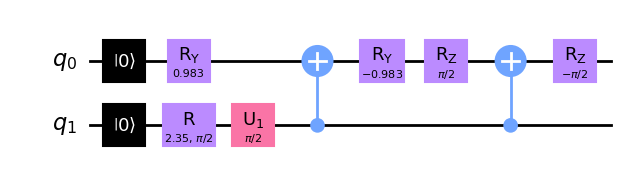

In [10]:
desired_state = [
    1 / math.sqrt(15.25) * 1.5,
    0,
    1 / math.sqrt(15.25) * -2,
    1 / math.sqrt(15.25) * 3]

qc = QuantumCircuit(2)
qc.initialize(desired_state, [0,1])

qc.decompose().decompose().decompose().decompose().decompose().draw(output='mpl')

The advantage of amplitude encoding is that it only requires $\mathrm{log}_2(NM)$ qubits to encode. However, subsequent algorithms must operate on the amplitudes of a quantum state, and methods to prepare and measure the quantum states tend not to be efficient. 

### Angle encoding

Angle encoding encodes $N$ features into the rotation angles of $n$ qubits, where $N \le n$. For example, the data point $x = (x_1,...,x_N)$ can be encoded as:
$$
\begin{align*}{|x\rangle} = {\bigotimes^N_{i=1}} \cos(x_i)|0\rangle + \sin(x_i)|1\rangle\end{align*}
$$
This is different from the previous two encoding methods, as it only encodes one data point at a time, rather than a whole dataset. It does, however, only require N qubits or less and a constant depth quantum circuit, making it amenable to current quantum hardware.

We can specify angle encoding as a unitary (A unitary operation is a reversible operation that preserves the norm (i.e. makes sure our probabilities always sum to 1)):
$$
\begin{align*} S_{x_j} = {\bigotimes_{i=1}^N} U(x_j^{(i)}) \end{align*}
$$

where:
$$
\begin{align*}U(x_j^{(i)}) = \begin{bmatrix} \cos(x_j^{(i)}) & -\sin(x_j^{(i)}) \\ \sin(x_j^{(i)}) & \cos(x_j^{(i)}) \\ \end{bmatrix}\end{align*}
$$

Remembering that a single-qubit rotation around the $Y$-axis is:
$$
\begin{align*}U(x_j^{(i)}) = \begin{bmatrix} \cos(x_j^{(i)}) & -\sin(x_j^{(i)}) \\ \sin(x_j^{(i)}) & \cos(x_j^{(i)}) \\ \end{bmatrix}\end{align*}
$$
We note that $U(x_j^{(i)}) = RY(2x_j^{(i)})$, and as an example, encode the data point using Qiskit:

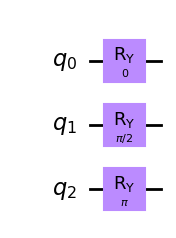

In [11]:
qc = QuantumCircuit(3)
qc.ry(0, 0)
qc.ry(2*math.pi/4, 1)
qc.ry(2*math.pi/2, 2)
qc.draw(output='mpl')

Dense angle encoding is a slight generalization of angle encoding, that encodes two features per qubit using the relative phase, where the data point $x = (x_1,...,x_N)$ can be encoded as:
$$
\begin{align*}|x\rangle = {\bigotimes_{i=1}^{N/2}} \cos(x_{2i-1})|0\rangle + e^{i x_{2i}}\sin(x_{2i-1})|1\rangle\end{align*}
$$
Although the angle and dense angle encoding use sinusoids and exponentials, there is nothing special about these functions. We can easily abstract these to a general class of qubit encodings that use arbitrary functions, or define the encodings as arbitrary unitaries, implemented as parameterized quantum circuits.

### Arbitrary encoding

Arbitrary encoding encodes $N$ features as rotations on $N$ parameterized gates on $n$ qubits, where $n\leq N$ . Like angle encoding, it only encodes one data point at a time, rather than a whole dataset. It also uses a constant depth quantum circuit and $n\leq N$ qubits, meaning it can be run on current quantum hardware.

For example, to use the Qiskit `EfficientSU2` circuit to encode 12 features, would only use 3 qubits:

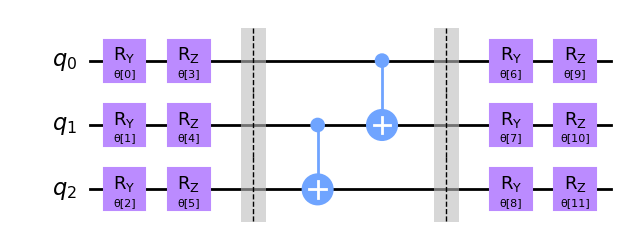

In [12]:
from qiskit.circuit.library import EfficientSU2
circuit = EfficientSU2(num_qubits=3, reps=1, insert_barriers=True)
circuit.decompose().draw(output='mpl')

Here we encode the data point with 12 features, $x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]$ using each of the parameterized gates to encode a different feature.

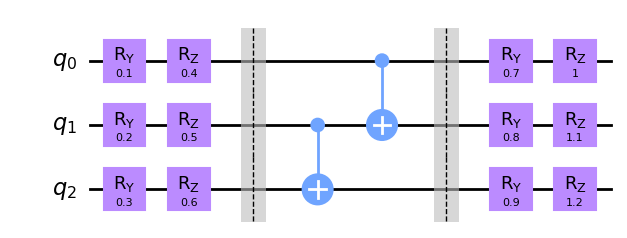

In [13]:
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]
encode = circuit.bind_parameters(x)
encode.decompose().draw(output='mpl')

The Qiskit `ZZFeatureMap` circuit with 3 qubits, only encodes a data point of 3 features, despite having 6 parameterized gates:

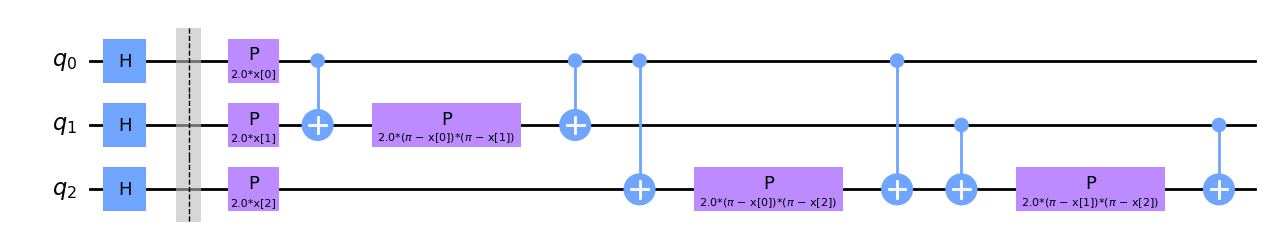

In [14]:
from qiskit.circuit.library import ZZFeatureMap
circuit = ZZFeatureMap(3, reps=1, insert_barriers=True)
circuit.decompose().draw(output='mpl')

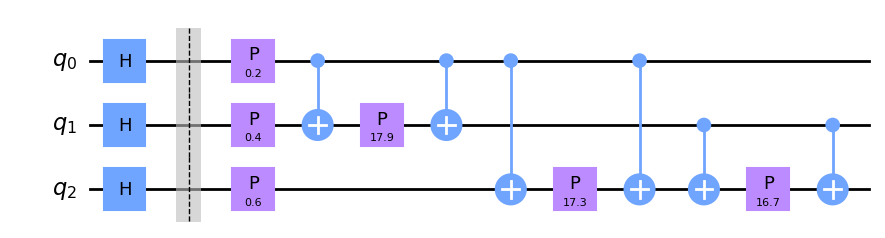

In [15]:
x = [0.1, 0.2, 0.3]
encode = circuit.bind_parameters(x)
encode.decompose().draw(output='mpl')